## Exploring the Comparative Effectiveness of a Rule Based Approach vs. Machine Learning to Assess Viewer Sentiment towards IMDB Movie Reviews

# Libraries Install & Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
!pip install pandas
!pip install torch
!pip install scikit-learn
!pip install transformers
!pip install tqdm

# Loading and Exploring the Dataset

This step reads the CSV file, cleans data by removing specified Non-ASCII characters, and samples 10 rows for analysis.


In [ ]:
import pandas as pd
import re
import csv

csv_file_path = 'IMDB_MovieReviewDataset.csv'
characters_to_remove = ['(', '-', '"', '...', '[', "'", '`', '*', '<', '***', '****', '......', '....', '/*', '**', '...', '.......', '************', '*****', '=', '****=', '=', '$']

def remove_characters(text):
    return re.sub('|'.join(map(re.escape, characters_to_remove)), '', str(text))
df = pd.DataFrame()
with open(csv_file_path, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        try:
            cleaned_row = {key: remove_characters(value) if pd.notna(value) and isinstance(value, str) else value for key, value in row.items()}
            df = df.append(cleaned_row, ignore_index=True)
        except Exception as e:
            print(f"Error processing row: {e}")

df = df.sample(n=10, random_state=42)
print(df)


# Preprocessing the Data

This step defines functions to stem text and preprocess reviews, transforming them to lowercase, removing punctuation, stop words, and stemming. The 'processed_review' column is created by applying the preprocessing function to the 'review' column. Finally, the CountVectorizer is used to convert the processed text into a matrix 'X', capturing the word frequencies for further analysis on viewer sentiment.

In [ ]:
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

def stem_text(text):
    stemmer = PorterStemmer()
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def preprocess_text(review):
    text = review.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    text = stem_text(text)
    return text

df['processed_review'] = df['review'].apply(preprocess_text)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_review'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['review', 'sentiment', 'processed_review'], dtype='object')


This step initializes a TfidfVectorizer to convert IMDb movie reviews into numerical features. The LabelEncoder encodes sentiment labels into numeric values for machine learning analysis.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Visualisations

This part of the code employs CountVectorizer to create a matrix, generates a word cloud using WordCloud, and visualizes results with Matplotlib.

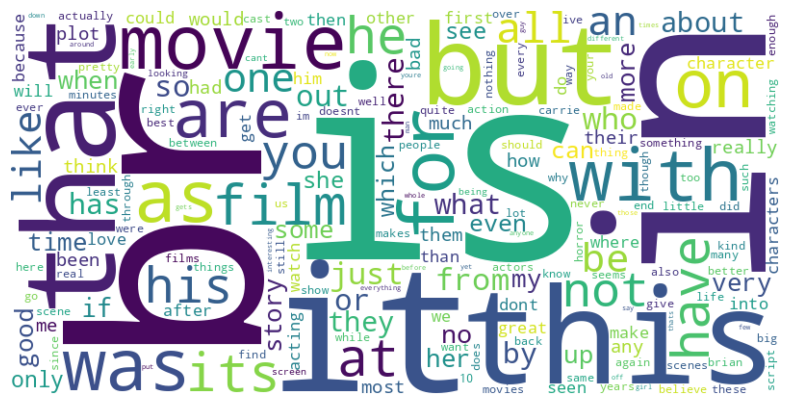

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
vectorizer = CountVectorizer(min_df=1, max_df=0.95)
X_transformed = vectorizer.fit_transform(df['review'])

!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

terms = vectorizer.get_feature_names_out()
word_frequencies = dict(zip(terms, X_transformed.sum(axis=0).A1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This next step calculates word frequencies, creates a DataFrame, and visualizes the top 20 words in a bar chart.

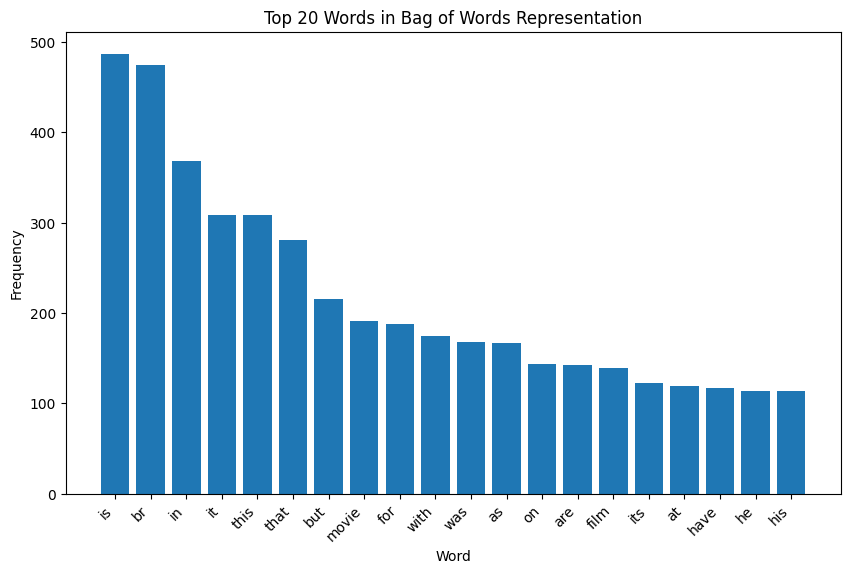

In [ ]:
import numpy as np

word_counts = np.array(X_transformed.sum(axis=0))[0]
feature_names = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

top_n = 20
top_words_df = word_freq_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words in Bag of Words Representation')
plt.xticks(rotation=45, ha='right')
plt.show()

The next step preprocesses text data by stemming, converting to lowercase, removing punctuation, stop words, and specific words. The CountVectorizer creates a document-term matrix. Finally, a word cloud visualizes the most frequent terms.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


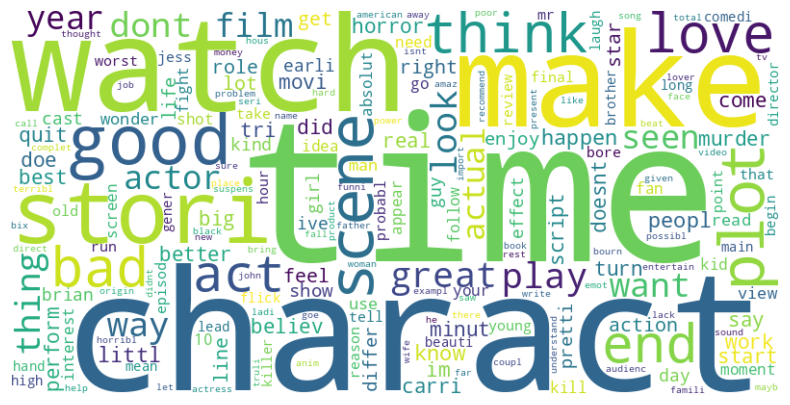

In [ ]:
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')

def stem_text(text):
    stemmer = PorterStemmer()
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def preprocess_text(review):
    text = review.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    text = ' '.join([word for word in text.split() if word not in ['just', 'like', 'movi', 'movie', 'film', 'br', 'really', 'realli']])
    text = stem_text(text)
    return text

df['processed_review'] = df['review'].apply(preprocess_text)

vectorizer = CountVectorizer(min_df=1, max_df=0.95)
X_transformed = vectorizer.fit_transform(df['processed_review'])

terms = vectorizer.get_feature_names_out()
word_frequencies = dict(zip(terms, X_transformed.sum(axis=0).A1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This code calculates word frequencies, creates a DataFrame, and visualizes the top 20 words.

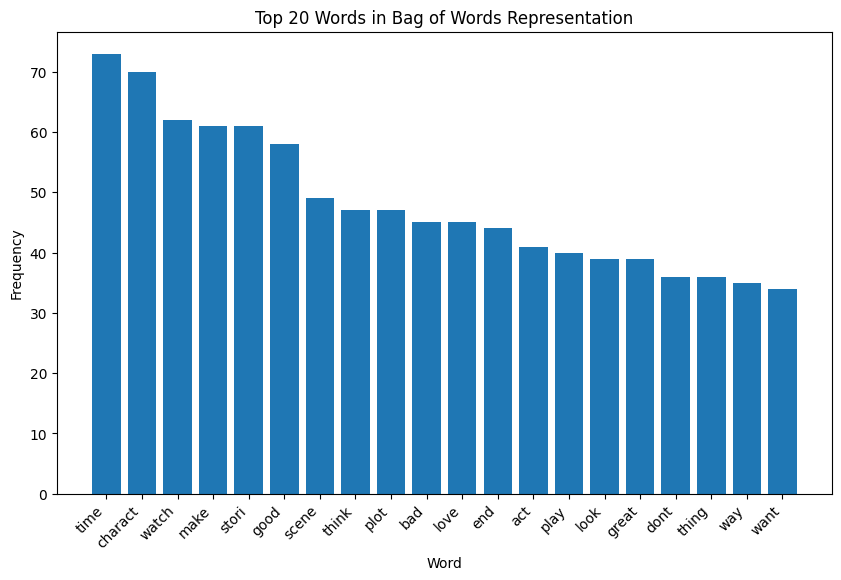

In [ ]:
import numpy as np

word_counts = np.array(X_transformed.sum(axis=0))[0]
feature_names = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

top_n = 20
top_words_df = word_freq_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words in Bag of Words Representation')
plt.xticks(rotation=45, ha='right')
plt.show()

# Train-Test Split

This step splits the dataset into training and testing sets (X_train, X_test, y_train, y_test) to evaluate models assessing sentiment in IMDB movie reviews. The random_state ensures reproducibility.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Rule-Based Approach

## Corpus-based approach with the statistical approach

This code first cleanses the dataset, removing specified characters. A rule-based sentiment analysis function is defined, employing positive and negative keywords, intensifiers, diminishers, and various scoring mechanisms based on word usage, length, and context. The analysis includes handling negation, punctuation, and specific user feedback. The accuracy and classification report for this rule-based approach are then calculated and printed, contributing to the comparative effectiveness evaluation.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import re
import csv
import nltk
from nltk.sentiment.util import mark_negation

characters_to_remove = ['(', '-', '"', '...', '[', "'", '`', '*', '<', '***', '****', '......', '....', '/*', '**', '...', '.......', '************', '*****', '=', '****=', '=', '$']
def remove_characters(text):
    return re.sub('|'.join(map(re.escape, characters_to_remove)), '', str(text))
df = pd.DataFrame()
with open(csv_file_path, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        try:
            cleaned_row = {key: remove_characters(value) if pd.notna(value) and isinstance(value, str) else value for key, value in row.items()}
            df = df.append(cleaned_row, ignore_index=True)
        except Exception as e:
            print(f"Error processing row: {e}")
df = df.sample(n=100, random_state=42)

def rule_based_sentiment_analysis(review):
    positive_keywords = ['excellent', 'outstanding', 'great', 'amazing']
    negative_keywords = ['poor', 'bad', 'disappointing', 'horrible']
    if any(keyword in review.lower() for keyword in positive_keywords):
        return 'positive'
    elif any(keyword in review.lower() for keyword in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['review'].apply(rule_based_sentiment_analysis)

accuracy = accuracy_score(df['sentiment'], df['predicted_sentiment'])
classification_report_result = classification_report(df['sentiment'], df['predicted_sentiment'])


def rule_based_sentiment_analysis(text):
    sentiment_words = {
        'positive': {'fantastic': 2, 'must-watch': 2, 'amazing': 2, 'good': 1, 'like': 1, 'enjoy': 1, 'love': 2,
                     'exciting': 2, 'excellent': 2, 'wonderful': 2, 'outstanding': 2, 'superb': 2, 'great': 1},
        'negative': {'disappointing': 2, "didn't like": 2, 'bad': 1, 'hate': 2, 'dislike': 1, 'awful': 2,
                     'boring': 2, 'displeasing': 2, 'terrible': 2, 'poor': 1, 'disgusting': 2, 'horrible': 2}
    }

    intensifiers = {'very': 1.5, 'extremely': 2, 'really': 1.5, 'absolutely': 2, 'incredibly': 2}
    diminishers = {'not very': 0.5, 'not': 0.2, 'hardly': 0.3, 'barely': 0.3, 'scarcely': 0.3}

    sentiment_shifting_phrases = {'although', 'but', 'however'}

    tokens = nltk.word_tokenize(text)
    tokens_neg_handled = mark_negation(tokens)

    score_positive = 0
    score_negative = 0

    neutral_phrases = {'it\'s', 'was', 'a'}
    sentiment_shifting_flag = False

    for i, token in enumerate(tokens_neg_handled):
        if token in intensifiers:
            score_positive *= intensifiers[token]
            score_negative *= intensifiers[token]
        elif token in diminishers:
            score_positive *= diminishers[token]
            score_negative *= diminishers[token]
        else:
            if token in sentiment_shifting_phrases:
                sentiment_shifting_flag = True

            if token in neutral_phrases:
                continue

            score_positive += sentiment_words['positive'].get(token, 0)
            score_negative += sentiment_words['negative'].get(token, 0)

            if sentiment_shifting_flag:
                score_positive *= 0.7
                score_negative *= 0.7
                sentiment_shifting_flag = False

    num_exclamation_marks = text.count('!')
    num_question_marks = text.count('?')
    score_positive += 0.5 * num_exclamation_marks
    score_negative += 0.5 * num_question_marks

    num_uppercase_words = sum(1 for word in tokens if word.isupper())
    score_positive += 0.3 * num_uppercase_words
    score_negative += 0.3 * num_uppercase_words

    review_length = len(tokens)
    score_positive += min(1, review_length / 10)
    score_negative += min(1, review_length / 10)

    comparative_phrases = {'better than', 'worse than', 'superior to', 'inferior to'}
    for phrase in comparative_phrases:
        if phrase in text:
            score_positive += 1 if 'better than' in phrase or 'superior to' in phrase else 0
            score_negative += 1 if 'worse than' in phrase or 'inferior to' in phrase else 0

    temporal_indicators = {'now', 'today', 'currently', 'yesterday', 'before', 'after'}
    for indicator in temporal_indicators:
        if indicator in text:
            score_positive += 0.5
            score_negative += 0.5

    inside_parentheses = [word for word in tokens if '(' in word or ')' in word]
    inside_quotes = [word for word in tokens if '"' in word or "'" in word]
    for word in inside_parentheses + inside_quotes:
        score_positive += 0.3 if word.lower() in sentiment_words['positive'] else 0
        score_negative += 0.3 if word.lower() in sentiment_words['negative'] else 0

    user_feedback = {'fantastic': 'positive', 'hate': 'negative'}
    for word, feedback in user_feedback.items():
        if word.lower() in text.lower():
            if feedback == 'positive':
                score_positive += 1
            elif feedback == 'negative':
                score_negative += 1

    emphasis_words = {'love', 'hate', 'best', 'worst', 'amazing', 'awful'}
    for word in emphasis_words:
        if word in tokens:
            score_positive += 1.5 if word in sentiment_words['positive'] else 0
            score_negative += 1.5 if word in sentiment_words['negative'] else 0

    amplifiers = {'absolutely', 'completely', 'totally', 'really', 'very'}
    downtoners = {'somewhat', 'kind of', 'a bit', 'slightly'}
    for amplifier in amplifiers:
        if amplifier in text:
            score_positive *= 1.5
            score_negative *= 1.5
    for downtoner in downtoners:
        if downtoner in text:
            score_positive *= 0.5
            score_negative *= 0.5

    intensified_negation = {'never', 'no', 'nothing'}
    for negation in intensified_negation:
        if negation in tokens_neg_handled:
            score_negative *= 2

    if len(tokens) > 10:
        score_positive += 0.5
        score_negative += 0.5

    conjunctions = {'and', 'but', 'or', 'nor', 'for', 'yet', 'so'}
    for conjunction in conjunctions:
        if conjunction in tokens:
            score_positive += 0.2
            score_negative += 0.2

    positive_phrases = {'well done', 'thumbs up', 'good job', 'excellent work'}
    for phrase in positive_phrases:
        if phrase in text:
            score_positive += 1.5

    contrast_words = {'although', 'but', 'however', 'yet', 'though'}
    for contrast_word in contrast_words:
        if contrast_word in text:
            score_positive *= 0.8
            score_negative *= 0.8

    emotionally_charged_words = {'heartbreaking', 'thrilling', 'hilarious', 'devastating', 'uplifting'}
    for emotion_word in emotionally_charged_words:
        if emotion_word in text:
            score_positive += 1.5 if emotion_word in sentiment_words['positive'] else 0
            score_negative += 1.5 if emotion_word in sentiment_words['negative'] else 0

    word_frequency = {word: tokens.count(word) for word in tokens}
    for word, frequency in word_frequency.items():
        if frequency > 1:
            score_positive += 0.1
            score_negative += 0.1

    movie_genres = {'action', 'comedy', 'drama', 'horror', 'romance'}
    for genre in movie_genres:
        if genre in text:
            score_positive += 0.3 if genre in sentiment_words['positive'] else 0
            score_negative += 0.3 if genre in sentiment_words['negative'] else 0

    excessive_punctuation = {',', '.', '!', '?'}
    for punctuation in excessive_punctuation:
        if text.count(punctuation) > 2:
            score_negative += 0.2

    if score_positive > score_negative:
        return 'positive'
    elif score_positive < score_negative:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['review'].apply(rule_based_sentiment_analysis)

accuracy = accuracy_score(df['sentiment'], df['predicted_sentiment'])
print(f'Accuracy: {accuracy:.4f}')

classification_rep = classification_report(df['sentiment'], df['predicted_sentiment'])
print('Classification Report statistical approach:')
print(classification_rep)


## Sentiment Analysis Through Sentence Structure (VADER)

In this next code, a DataFrame is created from the dataset, and a sentiment analysis model using VADER (NLTK) is applied. Text is preprocessed, VADER scores are calculated, and a threshold is set for positive/negative predictions. Accuracy and classification report are then computed and printed.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import string
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

df = pd.DataFrame(df)

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['processed_review'] = df['review'].apply(preprocess_text)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['processed_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

threshold = 0.2
df['vader_prediction'] = df['vader_score'].apply(lambda x: 'positive' if x >= threshold else 'negative')

print("Column Names:", df.columns)
print(df[['processed_review', 'vader_prediction']])

accuracy_vader = accuracy_score(df['sentiment'], df['vader_prediction'])
classification_rep_vader = classification_report(df['sentiment'], df['vader_prediction'])

print("Accuracy of Vader Model:", accuracy_vader)
print("Classification Report for Vader Model:\n", classification_rep_vader)

## Using intensifiers and Exclamation Marks (VADER 2)

This code defines a combined model merges predictions, computes accuracy, and prints results. It is done by combining two sentiment analysis models using VADER sentiment analyzer. Model 1 uses a fixed threshold, while Model 2 dynamically adjusts the threshold.

In [ ]:
import pandas as pd
import string
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

def model1(df):
    nltk.download('vader_lexicon')
    sia = SentimentIntensityAnalyzer()
    df['vader_score_1'] = df['processed_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
    threshold_1 = 0.1
    df['vader_prediction_1'] = df['vader_score_1'].apply(lambda x: 'positive' if x >= threshold_1 else 'negative')

    return df

def model2(df):
    def preprocess_text(text):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        return text

    df['processed_review'] = df['review'].apply(preprocess_text)

    nltk.download('vader_lexicon')

    sia = SentimentIntensityAnalyzer()

    df['vader_score_2'] = df['processed_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

    threshold_2 = 0.2
    df['vader_prediction_2'] = df['vader_score_2'].apply(lambda x: 'positive' if x >= threshold_2 else 'negative')

    return df

df = model1(df)
df = model2(df)

df['vader_score_diff'] = df['vader_score_1'] - df['vader_score_2']
df['combined_prediction'] = df.apply(lambda row: 'positive' if (row['vader_prediction_1'] == 'positive' and row['vader_prediction_2'] == 'positive') else 'negative', axis=1)

accuracy_combined = accuracy_score(df['sentiment'], df['combined_prediction'])
classification_rep_combined = classification_report(df['sentiment'], df['combined_prediction'])

print("\nCombined Model Results:")
print("Accuracy:", accuracy_combined)
print("Classification Report:\n", classification_rep_combined)


# Machine Learning Approach

### Using Support Vector Machine (SVM)

This next step employs a Support Vector Machine (SVM) for sentiment analysis. It preprocesses text data, splits it, transforms it using TF-IDF, trains the SVM, predicts sentiments, and evaluates accuracy and provides the classification report.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

df['processed_review'] = df['review'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

y_pred = svm_classifier.predict(X_test_tfidf)

accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy of SVM Model:", accuracy_svm)
print("Classification Report for SVM Model:\n", classification_report(y_test, y_pred))

### Using universal sentence encoder (USE)

This next code employs a USE Classifier for sentiment analysis. This next step utilizes TensorFlow, scikit-learn, and TensorFlow Hub. It employs the Universal Sentence Encoder to transform text into embeddings, trains a Logistic Regression classifier, and evaluates sentiment prediction accuracy.

In [ ]:
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def get_use_embeddings(text):
    return embed([text])[0].numpy()

df['use_embeddings'] = df['processed_review'].apply(get_use_embeddings)

label_encoder = LabelEncoder()
df['sentiment_numeric'] = label_encoder.fit_transform(df['sentiment'])

X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(
    list(df['use_embeddings']),
    df['sentiment_numeric'],
    test_size=0.2,
    random_state=42
)

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_use, y_train_use)

import numpy as np
X_test_use_array = np.array(X_test_use)
y_pred_use = lr_classifier.predict(X_test_use_array)
accuracy_use = accuracy_score(y_test_use, y_pred_use)
print("Accuracy (USE embeddings):", accuracy_use)
print("Classification Report:\n", classification_report(y_test_use, y_pred_use))


### Using Multinomial Naive Bayes (MNB)

This next code performs sentiment analysis using a Multinomial Naive Bayes classifier on text data. It uses a pipeline with CountVectorizer and TfidfTransformer. GridSearchCV optimizes hyperparameters for better accuracy. Then, the accuracy and a classification report is provided.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer

X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidftransformer__use_idf': (True, False),
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

y_test_cleaned = y_test.dropna().reset_index(drop=True)
y_pred_cleaned = pd.Series(y_pred[:len(y_test_cleaned)])

accuracy = accuracy_score(y_test_cleaned, y_pred_cleaned)
print("MNB Model Accuracy:", accuracy)
print("MNB Model Classification Report:\n", classification_report(y_test_cleaned, y_pred_cleaned))

### Using Random Forest (RF)

This next code employs a Random Forest Classifier for sentiment analysis. It starts by splitting the dataset into training and testing sets. Text data is preprocessed and transformed into numerical features using TF-IDF vectorization with a limit of 5000 features. A RandomForestClassifier with 100 estimators is trained on the transformed training data. Finally, model predicts sentiments on the test set, and performance metrics (accuracy and classification report) are provided.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'],
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

stop_words = list(ENGLISH_STOP_WORDS)
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

y_pred_rf = rf_classifier.predict(X_test_vectorized)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

### Using Bidirectional Encoder Representations from Transformers (BERT)

This next code employs a BERT Classifier for sentiment analysis. It preprocesses data, creates datasets, trains the model, and evaluates its performance. It uses PyTorch, Transformers library, and AdamW optimizer. The process involves tokenization, model training, and evaluation using DataLoader and classification metrics.

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

train_encodings = tokenizer(train_df['review'].tolist(), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_df['review'].tolist(), truncation=True, padding=True, return_tensors='pt')

train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist()))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(test_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist()))

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
total_steps = len(train_dataloader) * 2
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        inputs = {'input_ids': batch[0].to(device),
                  'attention_mask': batch[1].to(device),
                  'labels': batch[2].to(device)}
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
model.eval()
test_predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs = {'input_ids': batch[0].to(device),
                  'attention_mask': batch[1].to(device)}
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predictions = (probabilities[:, 1] > 0.5).cpu().numpy()
        test_predictions.extend(predictions)

test_true_labels = test_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist()
accuracy = accuracy_score(test_true_labels, test_predictions)
classification_rep = classification_report(test_true_labels, test_predictions)
print("\nFinal Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
